In [193]:
import TickLoader

import numpy as np
import pandas as pd
import datetime as dt
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython import get_ipython

In [194]:
Raw_Data = pd.read_csv('Cocoa_arb_python_data.csv')
Raw_Data = Raw_Data.rename(columns={'Unnamed: 0': 'Date'})
Raw_Data['Date'] = pd.to_datetime(Raw_Data['Date'])  
Data_mask = (Raw_Data['Date'] > '2016-1-1') 
Data=Raw_Data.loc[Data_mask]


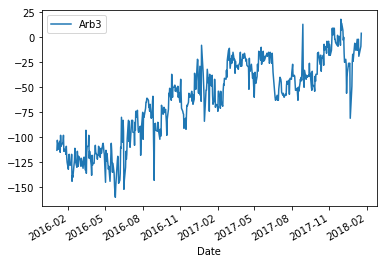

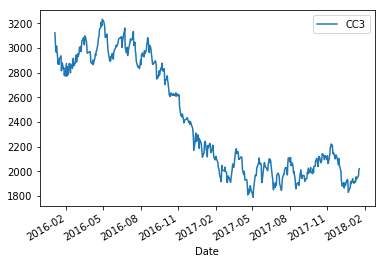

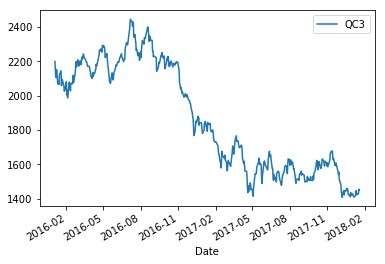

In [195]:
Data.plot(x='Date',y='Arb3')
Data.plot(x='Date',y='CC3')
Data.plot(x='Date',y='QC3')
plt.show()


In [199]:
from collections import Counter

Data['Arb1_delta'] = Data.Arb1.diff().fillna(0)
Data['Arb2_delta'] = Data.Arb2.diff().fillna(0)
Data['Arb3_delta'] = Data.Arb3.diff().fillna(0)
Data['CC1_delta'] = Data.CC1.diff().fillna(0)
Data['CC2_delta'] = Data.CC2.diff().fillna(0)
Data['CC3_delta'] = Data.CC3.diff().fillna(0)
Data['QC1_delta'] = Data.QC1.diff().fillna(0)
Data['QC2_delta'] = Data.QC2.diff().fillna(0)
Data['QC3_delta'] = Data.QC3.diff().fillna(0)
Data['BP1_delta'] = Data.BP1.diff().fillna(0)



/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/local/TMG/samuel.kalt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy 

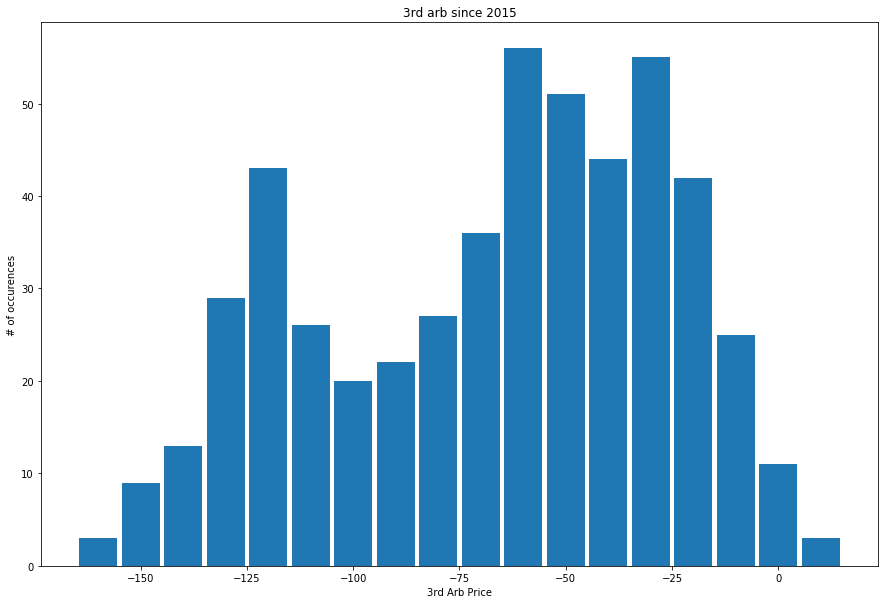

In [200]:
decile = lambda x: x // 10 * 10
histogram = Counter(decile(x) for x in Data.Arb3)
plt.figure(figsize=(15,10))
plt.bar(histogram.keys(),histogram.values(), width=9)
plt.title("3rd arb since 2015")
plt.xlabel("3rd Arb Price")
plt.ylabel("# of occurences")
plt.show()

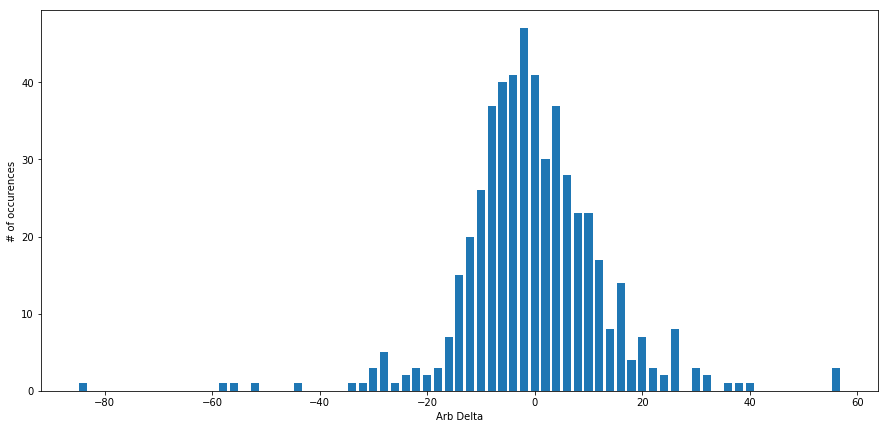

515
-84.0
56.0


In [201]:
decile = lambda x: x // 2 * 2
histogram = Counter(decile(x) for x in Data.Arb3_delta)
plt.figure(figsize=(15,7))
plt.bar(histogram.keys(),histogram.values(), width=1.5)
plt.xlabel("Arb Delta")
plt.ylabel("# of occurences")
plt.show()

print len(Data.Arb3_delta)
print  min(Data.Arb3_delta)
print  max(Data.Arb3_delta)



In [202]:
def quantile(x,p):
    p_index=int(p*len(x))
    return sorted(x)[p_index]

print quantile(Data.Arb3_delta,0.9)
print quantile(Data.Arb3_delta,0.95)
print quantile(Data.Arb3_delta,0.98)
print quantile(Data.Arb3_delta,0.99)
print max(Data.Arb3_delta)
print ""
print quantile(Data.Arb3_delta,0.1)
print quantile(Data.Arb3_delta,0.05)
print quantile(Data.Arb3_delta,0.02)
print quantile(Data.Arb3_delta,0.01)
print min(Data.Arb3_delta)

15.0
21.0
31.0
37.0
56.0

-12.0
-17.0
-28.0
-33.0
-84.0


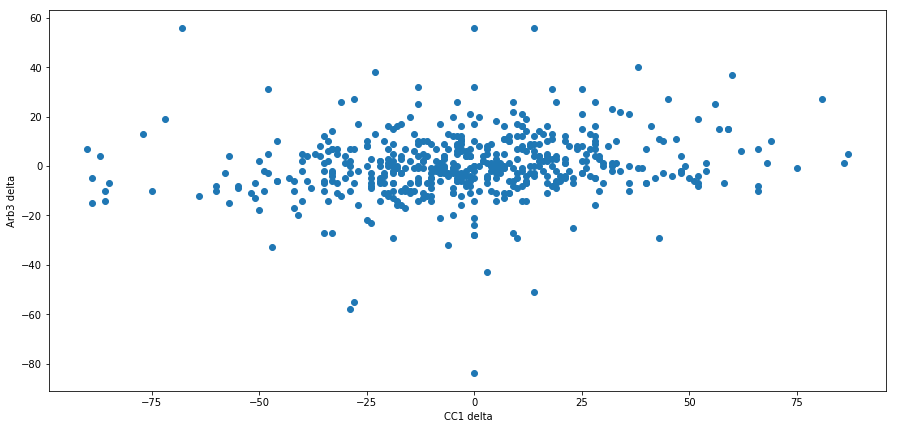

In [203]:
plt.figure(figsize=(15,7))
plt.scatter(Data.QC1_delta,Data.Arb3_delta)
plt.xlabel("CC1 delta")
plt.ylabel("Arb3 delta")
plt.show()

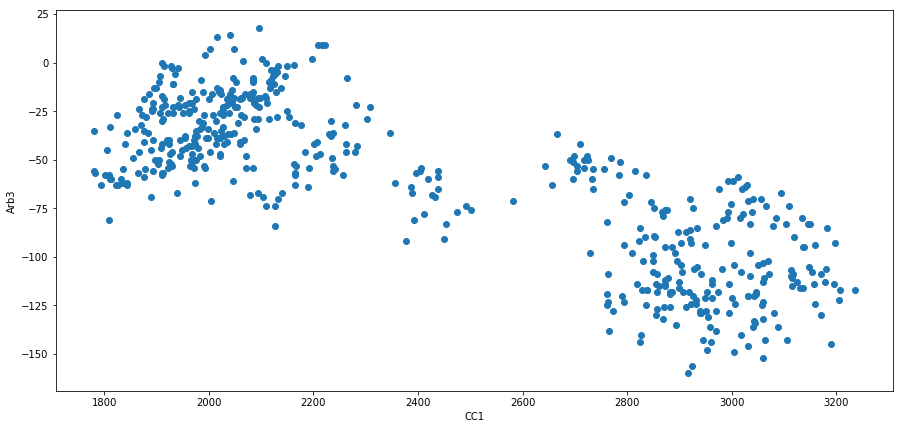

In [207]:
plt.figure(figsize=(15,7))
plt.scatter(Data.CC1,Data.Arb3)
plt.xlabel("CC1")
plt.ylabel("Arb3")
plt.show()

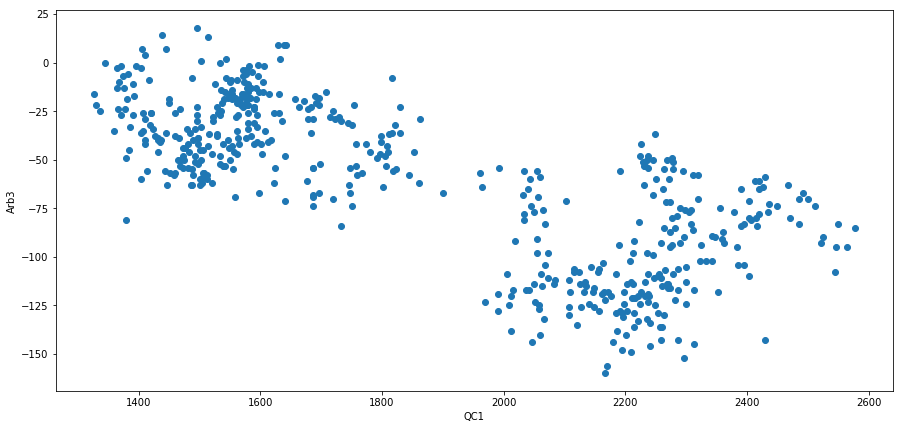

In [208]:
plt.figure(figsize=(15,7))
plt.scatter(Data.QC1,Data.Arb3)
plt.xlabel("QC1")
plt.ylabel("Arb3")
plt.show()

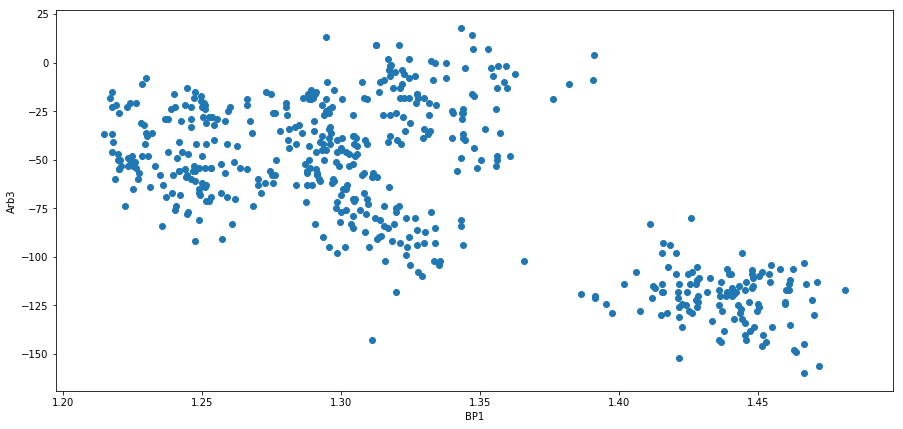

In [180]:
plt.figure(figsize=(15,7))
plt.scatter(Data.BP1,Data.Arb3)
plt.xlabel("BP1")
plt.ylabel("Arb3")
plt.show()


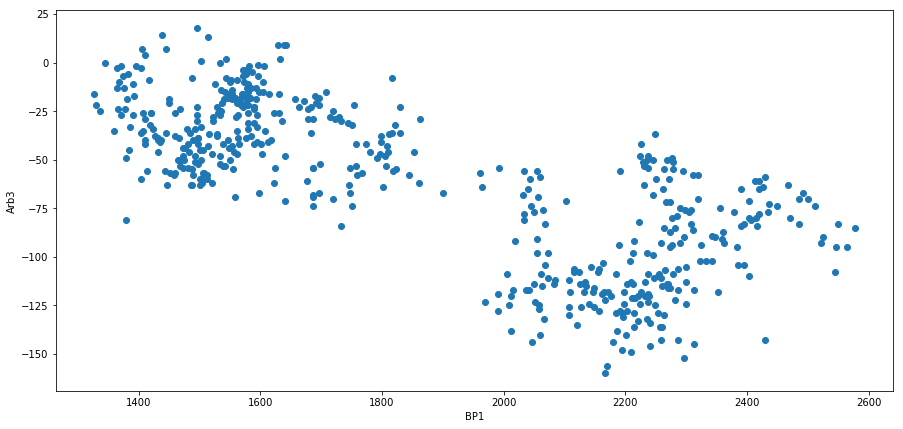

In [181]:
plt.figure(figsize=(15,7))
plt.scatter(Data.QC1,Data.Arb3)
plt.xlabel("QC1")
plt.ylabel("Arb3")
plt.show()



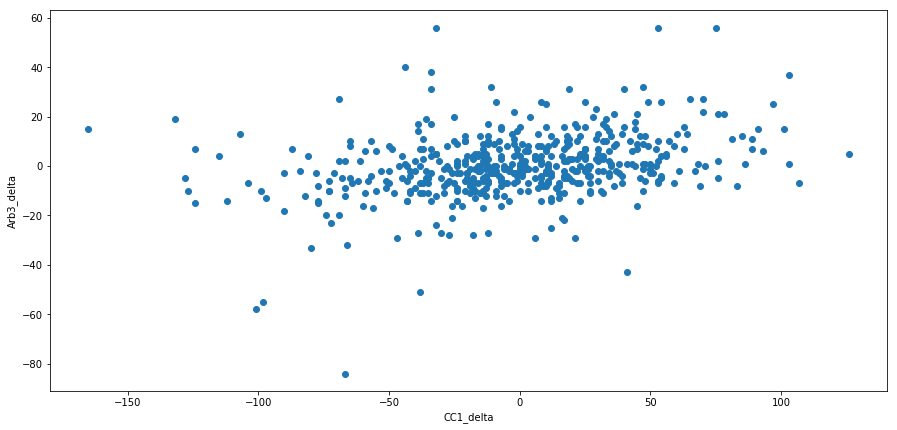

In [185]:
plt.figure(figsize=(15,7))
plt.scatter(Data.CC1_delta,Data.Arb3_delta)
plt.xlabel("CC1_delta")
plt.ylabel("Arb3_delta")
plt.show()

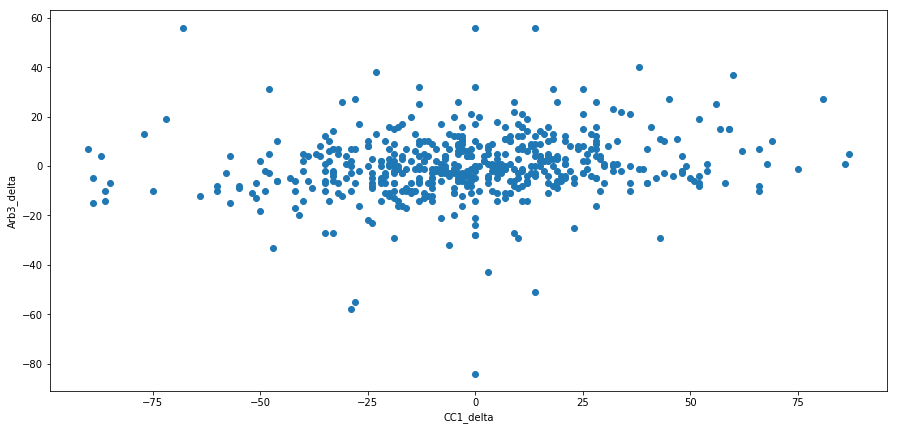

In [186]:
plt.figure(figsize=(15,7))
plt.scatter(Data.QC1_delta,Data.Arb3_delta)
plt.xlabel("CC1_delta")
plt.ylabel("Arb3_delta")
plt.show()

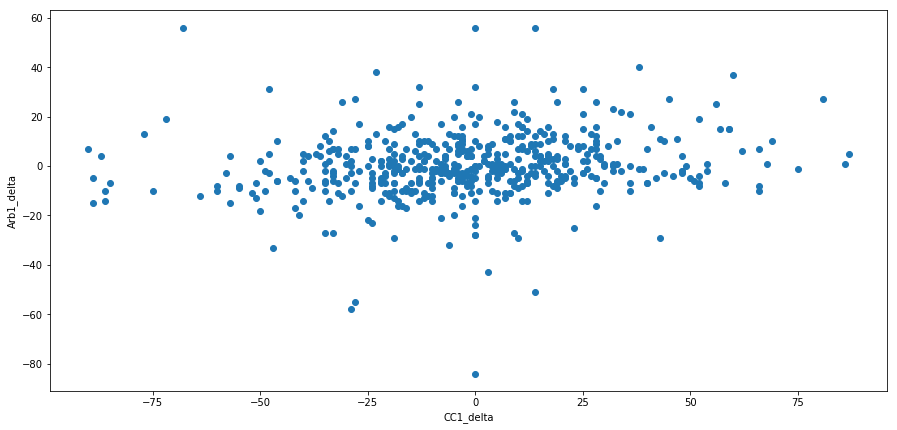

In [187]:
plt.figure(figsize=(15,7))
plt.scatter(Data.QC1_delta,Data.Arb3_delta)
plt.xlabel("CC1_delta")
plt.ylabel("Arb1_delta")
plt.show()

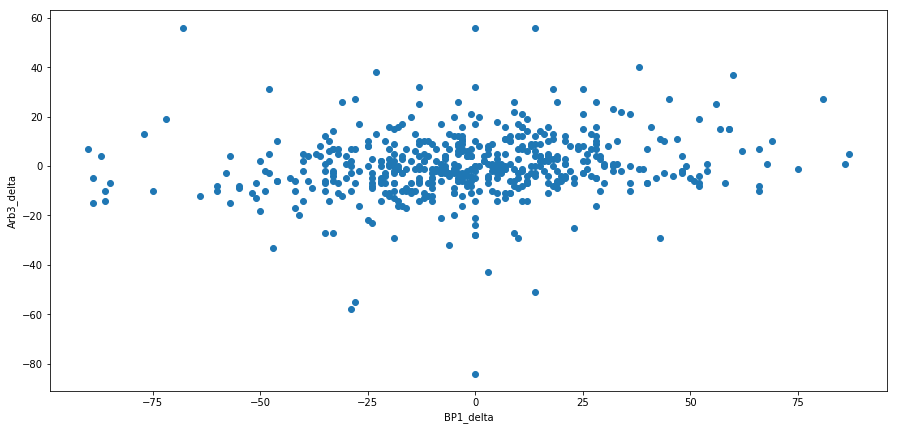

In [188]:
plt.figure(figsize=(15,7))
plt.scatter(Data.QC1_delta,Data.Arb3_delta)
plt.xlabel("BP1_delta")
plt.ylabel("Arb3_delta")
plt.show()